# **Data Cleaning**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df=pd.read_csv('/content/Student_Exam_Data.csv')

In [3]:
df

,StudentName,PracticeTestScore,AttendancePercentage,ClearedExam
0,Anjali Gupta,79,84,1
1,Krishna Sharma,57,92,0
2,Aditya Patel,98,87,1
3,Siddharth Kumar,68,65,0
4,Pooja Kumar,85,88,1
...,...,...,...,...
995,Ritika Kumar,61,87,0
996,Riya Verma,54,78,0
997,Arnav Verma,84,84,1
998,Ritika Kumar,86,88,1


In [6]:
# Check for missing values
df.isnull().sum()

,0
StudentName,0
PracticeTestScore,0
AttendancePercentage,0
ClearedExam,0


In [7]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   StudentName           1000 non-null   object
 1   PracticeTestScore     1000 non-null   int64 
 2   AttendancePercentage  1000 non-null   int64 
 3   ClearedExam           1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [8]:
#getting statistical description
df.describe()

,PracticeTestScore,AttendancePercentage,ClearedExam
count,1000.000000,1000.000000,1000.000000
mean,75.118000,79.610000,0.238000
std,14.921485,12.061898,0.426072
min,50.000000,60.000000,0.000000
25%,62.000000,69.000000,0.000000
50%,74.000000,80.000000,0.000000
75%,89.000000,90.000000,0.000000
max,100.000000,100.000000,1.000000


In [10]:
# unique values
df.apply(lambda x: len(x.unique()))

,0
StudentName,39
PracticeTestScore,51
AttendancePercentage,41
ClearedExam,2


In [12]:
#Remove duplicates
df.duplicated().sum()

9

In [13]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.dtypes

,0
StudentName,object
PracticeTestScore,int64
AttendancePercentage,int64
ClearedExam,int64


In [17]:
#Standardize data types
df["PracticeTestScore"] = df["PracticeTestScore"].astype(int)
df["AttendancePercentage"] = df["AttendancePercentage"].astype(int)
df["ClearedExam"] = df["ClearedExam"].astype(int)

In [18]:
# Handle outliers

df["PracticeTestScore"] = df["PracticeTestScore"].clip(lower=50, upper=100)
df["AttendancePercentage"] = df["AttendancePercentage"].clip(lower=60, upper=100)

In [19]:
#Standardize text formatting for names
df["StudentName"] = df["StudentName"].str.title()

In [20]:
df.head()

,StudentName,PracticeTestScore,AttendancePercentage,ClearedExam
0,Anjali Gupta,79,84,1
1,Krishna Sharma,57,92,0
2,Aditya Patel,98,87,1
3,Siddharth Kumar,68,65,0
4,Pooja Kumar,85,88,1


In [22]:
#Verify logical consistency
# Recalculate ClearedExam based on PracticeTestScore and AttendancePercentage
df["ClearedExam"] = df.apply(
    lambda x: 1 if x["PracticeTestScore"] >= 75 and x["AttendancePercentage"] >= 80 else 0,
    axis=1,
)

In [23]:
df["ClearedExam"]

,ClearedExam
0,1
1,0
2,1
3,0
4,1
...,...
995,0
996,0
997,1
998,1


In [29]:
#Save the cleaned data to a new CSV file
df.to_csv('path_to_save_cleaned_data.csv', index=False)

print("Cleaned data saved successfully.")

Cleaned data saved successfully.


# **Data Visualization**

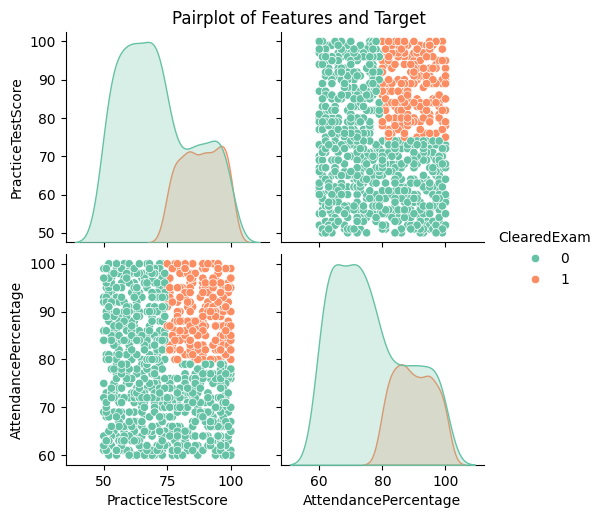

In [34]:
#Pairplot to explore relationships
sns.pairplot(df, hue="ClearedExam", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

### **Conclusion**
- Students with higher **PracticeTestScores** and **AttendancePercentages** are more likely to clear the exam.
- There's a clear clustering in the dataset where high scores and attendance correspond to cleared=1
- Lower values for both features are strongly associated with ClearedExam = 0


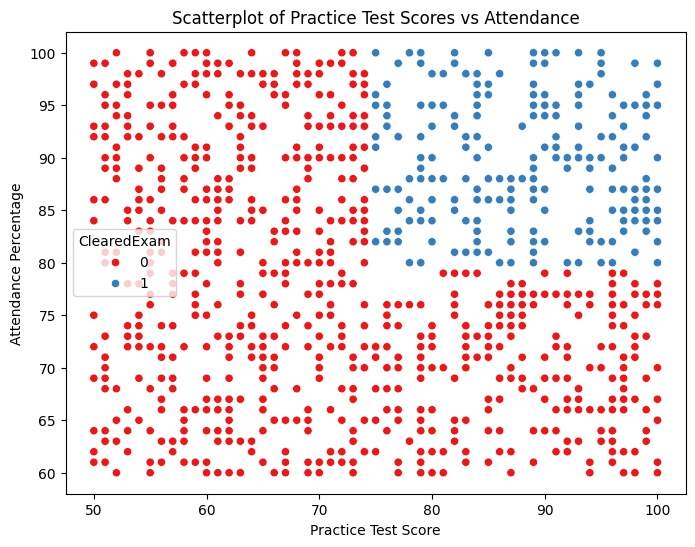

In [36]:
#Attendance vs. Practice Test Scores Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x="PracticeTestScore", y="AttendancePercentage", hue="ClearedExam", palette="Set1"
)
plt.title("Scatterplot of Practice Test Scores vs Attendance")
plt.xlabel("Practice Test Score")
plt.ylabel("Attendance Percentage")
plt.show()

cleared exam score students are very less as compared to uncleared one's .Around 75% students not cleared the exam.

# **Data Modelling**

In [32]:
# Features (X) and Target (y)
X = df[["PracticeTestScore", "AttendancePercentage"]]
y = df["ClearedExam"]

Split the Data
Split the data into training and testing sets.

In [38]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Train and Evaluate Different Classification Models.**

**a. Logistic Regression**

In [40]:
# Initialize Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))



Logistic Regression:
Accuracy: 0.9447236180904522
Confusion Matrix:
 [[148   8]
 [  3  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       156
           1       0.83      0.93      0.88        43

    accuracy                           0.94       199
   macro avg       0.91      0.94      0.92       199
weighted avg       0.95      0.94      0.95       199



**K-Nearest Neighbors (KNN)**

In [43]:
# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.9949748743718593
Confusion Matrix:
 [[156   0]
 [  1  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      0.98      0.99        43

    accuracy                           0.99       199
   macro avg       1.00      0.99      0.99       199
weighted avg       1.00      0.99      0.99       199



**c. Decision Tree Classifie**r

In [44]:
# Initialize Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Predict and evaluate
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))


Decision Tree Classifier:
Accuracy: 1.0
Confusion Matrix:
 [[156   0]
 [  0  43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        43

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



**e. Support Vector Machine (SVM)**

In [45]:
# Initialize SVM model
svm = SVC(kernel='linear')

# Train the model
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.9447236180904522
Confusion Matrix:
 [[149   7]
 [  4  39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       156
           1       0.85      0.91      0.88        43

    accuracy                           0.94       199
   macro avg       0.91      0.93      0.92       199
weighted avg       0.95      0.94      0.95       199



**Random Forest Classifier**

In [47]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 1.0
Confusion Matrix:
 [[156   0]
 [  0  43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00        43

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



## **Visualizing Model Performance**

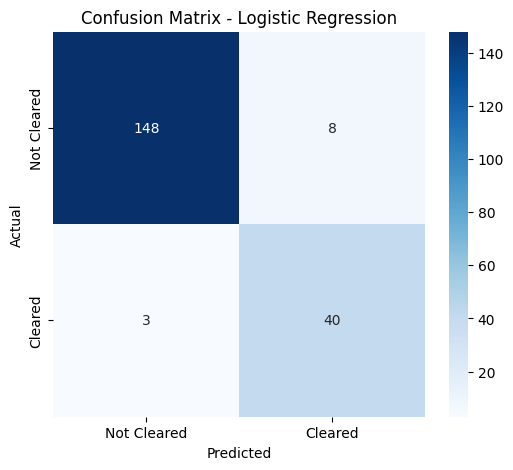

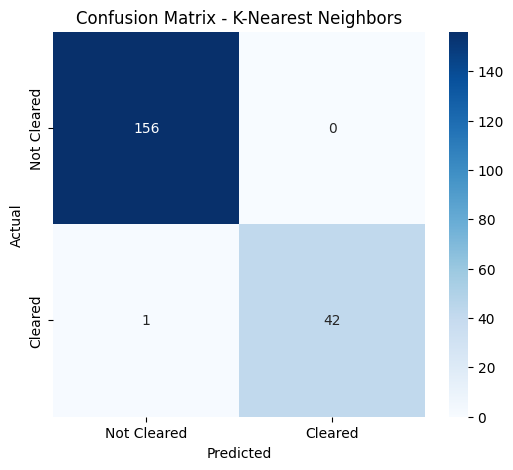

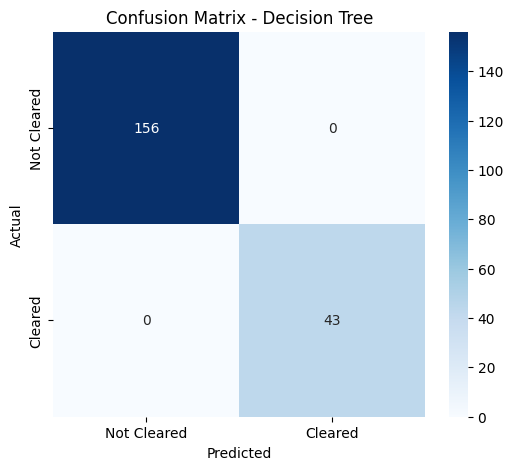

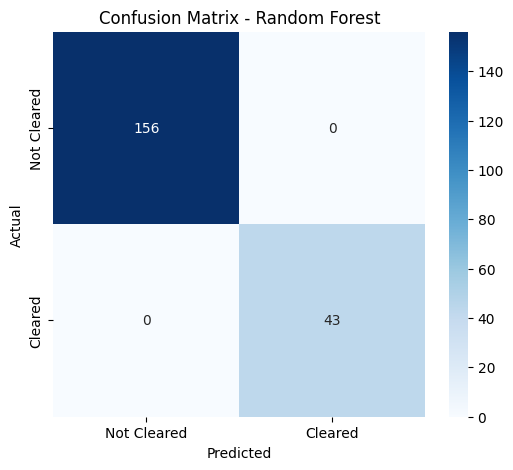

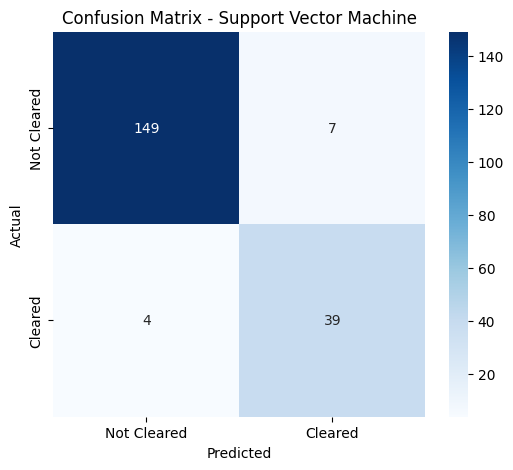

In [49]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Cleared", "Cleared"], yticklabels=["Not Cleared", "Cleared"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_knn, "K-Nearest Neighbors")
plot_confusion_matrix(y_test, y_pred_dtree, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "Support Vector Machine")


**KNN is the better-performing model for this task based on current results, but tuning its hyperparameters will further enhance its predictive power.**

In [52]:
# Create a dictionary to store the accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "K-Nearest Neighbors": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dtree),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Support Vector Machine": accuracy_score(y_test, y_pred_svm)}


# Convert the dictionary into a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=["Model", "Accuracy"])

In [53]:
accuracy_df

,Model,Accuracy
0,Logistic Regression,0.944724
1,K-Nearest Neighbors,0.994975
2,Decision Tree,1.000000
3,Random Forest,1.000000
4,Support Vector Machine,0.944724


### Model Performance Conclusion

- **Decision Tree** and **Random Forest** models achieved perfect accuracy (1.000), indicating that they fit the data extremely well and likely captured the underlying patterns effectively.
- **K-Nearest Neighbors** also performed exceptionally well with an accuracy of **99.5%**, making it a strong performer.
- **Logistic Regression** and **Support Vector Machine (SVM)** had lower but still impressive accuracy of **94.47%**, which suggests they performed decently, but there is potential for further improvement, especially with more complex datasets or fine-tuning.
  
**Recommendation:** For maximum performance, **Random Forest** and **Decision Tree** are ideal choices due to their higher accuracy. However, KNN is also a viable option, and further tuning of Logistic Regression and SVM might improve their results.


In [54]:
import joblib

# Save the KNN model using joblib
joblib.dump(knn, "KNN_model.joblib")

print("KNN model saved successfully.")


KNN model saved successfully.


In [56]:
# Load the KNN model
knn_loaded = joblib.load("KNN_model.joblib")

